In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

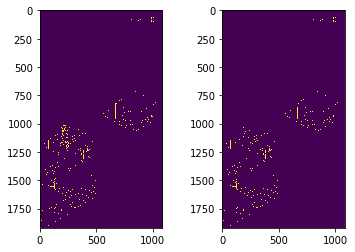

In [4]:
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(grayimg,cmap="gray")
plt.subplot(1,2,1)
edges = cv2.Canny(grayimg,0,50)
plt.imshow(cv2.Canny(grayimg,0,1))
plt.subplot(1,2,2)
plt.imshow(cv2.Canny(grayimg,0,100))

In [47]:
template = cv2.imread("template_player.png",1)
method = eval('cv2.TM_CCORR_NORMED')
img2 = img.copy()
res = cv2.matchTemplate(img2,template,method)

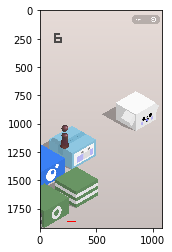

In [48]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
w = template.shape[1]
h = template.shape[0]
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img2,top_left, bottom_right, 255, 2)
plt.imshow(img2,cmap="gray")

In [53]:
print(template[25,:,0])
print(template[25,:,1])
print(template[25,:,2])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  36  44
  81  83  85  87  87  90  90  92  93  95  96  98 100 100 102 102 104 109
 109 110 112 113 118 120 126 126 130 134 139 141 148 152 156 159 162 165
 165 165 163 157 154 148 141 135 130 125 120  66  33   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  28  33
  60  60  61  61  61  62  62  63  63  63  63  63  64  64  63  62  64  66
  66  66  68  68  69  73  78  81  85  88  93  96 100 106 111 115 118 122
 122 121 119 111 108 101  95  90  85  81  77  42  21   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26  31
  56  56  58  60  61  61  61  61  64  63  63  64  65  65  70  71  70  72
  72  77  76  81  83  86  88  93  95 100 105 108 111 117 122 126 129 133
 133 132 130 122 119 113 107 103  98  93  88  47  23   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0

[[ 64  64  65  66  66  66  67  66  68  69  70  70  70  70  70  70  70  69
   69  67  67  66  65  65  65  64  63  60 204 204]
 [ 64  64  65  66  66  67  68  69  69  71  73  73  74  74  75  74  74  74
   74  74  71  70  70  68  68  66  66  63  59 204]
 [ 66  66  66  67  67  68  69  70  71  73  74  76  76  79  79  81  79  80
   79  79  78  76  76  75  73  71  69  68  64  61]
 [ 65  66  66  67  68  69  69  71  72  73  76  76  81  82  83  84  85  84
   85  85  84  83  81  78  77  75  74  71  69  64]
 [ 66  67  67  69  69  69  71  71  73  76  78  81  84  85  86  90  90  90
   90  91  90  87  86  84  82  81  77  75  72  69]
 [ 66  67  68  69  70  71  71  74  75  77  78  84  86  90  90  92  93  94
   97  95  94  93  93  93  88  86  83  81  76  72]
 [ 67  67  69  69  71  72  73  73  77  78  82  86  88  93  94  95  95  99
  102 102 100 101  99  98  95  92  90  86  82  77]
 [ 67  69  69  69  71  73  73  77  77  80  85  89  91  93  96  99 101 104
  107 108 107 107 105 103 101  96  94  91  86  82]


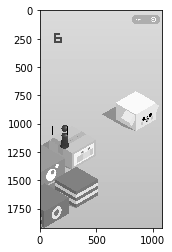

In [31]:
img2 = grayimg.copy()
print(img2[1020:1040,210:240])
draw = cv2.rectangle(img2,(110,1020),(240,1100),0,2)
plt.imshow(img2,cmap="gray")

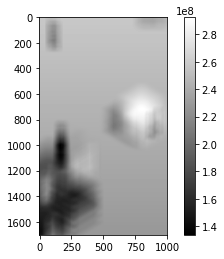

In [39]:
plt.imshow(res,cmap="gray")
plt.colorbar()

In [2]:
def my_correlation(img,template,stride):
    #assume scale = 1
    img2 = img.copy()
    t2 = template.copy()
    #if(len(img.shape())==3):
    #    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    #if(len(template.shape())==3):
    #    t2 = cv2.cvtColor(t2,cv2.COLOR_BGR2GRAY)
    img_shape = img2.shape
    template_shape = t2.shape
    print(img_shape)
    print(template_shape)
    mask = np.zeros(template_shape)
    for i in range(3):
        r,thre = cv2.threshold(t2[:,:,i],0,1,cv2.THRESH_BINARY)
        mask[:,:,i] += thre
    err = np.zeros((int((img_shape[0]-template_shape[0])/stride)+1,int((img_shape[1]-template_shape[1])/stride)+1))
    for row_it in range(0,img_shape[1]-template_shape[1],stride):
        for col_it in range(0,img_shape[0]-template_shape[0],stride):
            crop = img2[col_it:col_it+template_shape[0],row_it:row_it+template_shape[1],:]
            #print(crop.shape)
            crop = np.multiply(crop,mask)
            for channel in range(3):
                minus = np.reshape(crop[:,:,channel]-t2[:,:,channel],(1,template_shape[0]*template_shape[1]))
                err[int(col_it/stride),int(row_it/stride)] += np.linalg.norm(minus,2)
    min_loc = np.argmin(err)
    left_up = (int(min_loc/err.shape[1])*10,min_loc%(err.shape[1])*stride)
    bottom_middle = (left_up[0]+template_shape[0],left_up[1]+int(template_shape[1]/2))
    return bottom_middle

In [3]:
import math
def constructSearchArea(img,bottom_middle,theta,width):
    #(x_m,y_m),(x0,y0)
    #y-y0=tan(theta)(x-x0)
    #distance = (y_m-y0-tan(theta)(x-x0))/sqrt(1+(tan(theta))^2)
    #Area: distance<50(暂定) && y0<y_m
    #给定x0,得到y的范围是y_m+|x0-x_m|tan(theta)-50/cos(theta)~y_m+|x0-x_m|tan(theta)+50/cos(theta)
    x_m = bottom_middle[1]
    y_m = bottom_middle[0]
    templ = np.zeros((int(2*width/math.cos(theta)),int((x_m-width)/math.cos(theta)),3))
    print(templ.shape)
    for xprime in range(templ.shape[1]):
        for yprime in range(templ.shape[0]):
            x = int(2*width+xprime*math.cos(theta)-yprime*math.cos(theta))
            y = int(y_m-x_m*math.tan(theta)+xprime*math.sin(theta)+yprime*math.sin(theta))
            #print(x)
            #print(y)
            templ[yprime,xprime,:] = img[y,x,:]
    tempr = np.zeros((int(2*width/math.cos(theta)),int((img.shape[1]-x_m-width)/math.cos(theta)),3))
    print(tempr.shape)
    for xprime in range(tempr.shape[1]):
        for yprime in range(tempr.shape[0]):
            x = int(x_m-width+xprime*math.cos(theta)+yprime*math.cos(theta))
            y = int(y_m-width*math.tan(theta)-xprime*math.sin(theta)+yprime*math.sin(theta))
            tempr[yprime,xprime,:] = img[y,x,:]
    result = np.concatenate([templ,tempr],axis=1)
    return result,templ.shape[1]

In [4]:
def getBackgroundColor(img):
    img2 = img.astype(np.float64)
    return sum(img2[:,img2.shape[1]-1,:])/img2.shape[0]

(1920, 1080, 3)
(218, 82, 3)


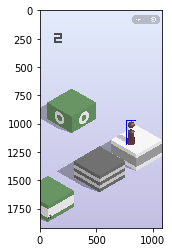

In [5]:
template = cv2.imread("template_player.png",1)
img = cv2.imread("./test3.png",1)
backgroundColor = getBackgroundColor(img)
bottom_middle = my_correlation(img,template,10)
img2 = img.copy()
cv2.rectangle(img2,(bottom_middle[1]-int(template.shape[1]/2),bottom_middle[0]-template.shape[0]),(bottom_middle[1]+int(template.shape[1]/2),bottom_middle[0]),(0,0,255),5)
plt.imshow(img2)

In [32]:
backgroundColor

array([ 211.815625  ,  213.5703125 ,  236.61822917])

In [6]:
area,left = constructSearchArea(img,bottom_middle,math.pi/6,140)

(323, 763, 3)
(323, 160, 3)


In [22]:
sum(area[:,0,:])/area.shape[0]
average = np.zeros((1,area.shape[1],3))
for i in range(area.shape[1]):
    average[0,i,:] = sum(area[:,i,:])/area.shape[0]
print(average[0,600:700,:])

[[  89.95275591   99.77952756  108.87401575]
 [  89.92125984   99.78346457  108.98031496]
 [  94.94488189  104.88976378  113.42519685]
 [  97.94488189  108.05905512  116.36220472]
 [  97.8976378   108.03543307  116.44488189]
 [  97.7992126   107.99606299  116.46062992]
 [  97.68110236  107.88188976  116.48425197]
 [  97.44094488  107.71259843  116.46062992]
 [  96.57480315  106.83464567  115.72834646]
 [  91.01968504  101.17716535  110.9488189 ]
 [  88.06299213   98.01181102  108.17322835]
 [  88.79133858   98.86614173  109.06299213]
 [  93.8503937   104.11417323  113.71259843]
 [  95.95669291  106.2992126   115.57480315]
 [  96.08267717  106.44094488  115.74409449]
 [  96.08267717  106.38582677  115.70472441]
 [  96.2007874   106.48818898  115.76771654]
 [  96.14566929  106.4488189   115.82677165]
 [  93.07480315  103.17322835  112.71259843]
 [  70.82283465   80.37401575   93.29133858]
 [  66.94094488   76.29133858   89.7992126 ]
 [  70.61417323   80.18897638   93.42519685]
 [  95.996

(346, 900, 3)


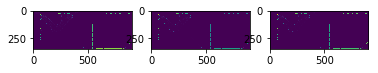

In [16]:
gradient = np.zeros((area.shape[0],area.shape[1]-1,3))
for i in range(gradient.shape[1]):
    gradient[:,i,:] = abs(area[:,i,:]-area[:,i+1,:])
plt.subplot(1,3,1)
plt.imshow(gradient[:,:,0])
plt.subplot(1,3,2)
plt.imshow(gradient[:,:,1])
plt.subplot(1,3,3)
plt.imshow(gradient[:,:,2])
print(area.shape)

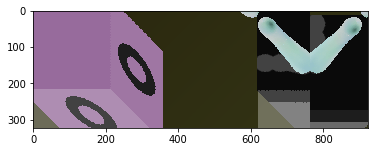

In [7]:
plt.imshow(area)
#print(area[:,527,:])

In [10]:
def getDirection(img,position,backgroundcolor):
    jumpercolor = img[int(img.shape[0]/2.5),position+1,:]
    #add shadow color here
    #backgroundcolor = sum(img[10:,0,:])/(img.shape[0]-10)
    print("background"+str(backgroundcolor))
    leftsample = []
    rightsample = []
    for i in range(10):
        try:
            if(sum(abs(img[int(img.shape[0]/2)+20+i,position+20+i,:]-jumpercolor))>50):
                rightsample.append(img[int(img.shape[0]/2)+20+i,position+20+i,:])
            if(sum(abs(img[int(img.shape[0]/2)+20+i,position-20-i,:]-jumpercolor))>50):
                leftsample.append(img[int(img.shape[0]/2)+20+i,position-20-i,:])
        except:
            break
    thisblockl = sum(leftsample)/len(leftsample)
    thisblockr = sum(rightsample)/len(rightsample)
    #print(jumpercolor)
    #print(backgroundcolor)
    #print(thisblockl)
    #print(thisblockr)
    #begin search
    flagl = False
    flagr = False
    boundary = 0
    i=position
    while(i>=0):
        current = img[int(img.shape[0]/2)+20,i,:]
        if(sum(abs(current-jumpercolor))>50 and sum(abs(current-backgroundcolor))>50 and sum(abs(current-thisblockl))>50):
            flagl = True
            boundary = i
            break
        i -= 5
    i=position
    while(i<img.shape[1]):
        current = img[int(img.shape[0]/2)+20,i,:]
        if(sum(abs(current-jumpercolor))>50 and sum(abs(current-backgroundcolor))>50 and sum(abs(current-thisblockr))>50):
            flagr = True
            boundary = i
            break
        i += 5
    #print(flagl)
    #print(flagr)
    assert (flagl*flagr == 0) and (flagl+flagr == 1)
    return flagl,flagr,boundary     

In [11]:
print(getDirection(area,left,backgroundColor))

background[ 211.          212.49635417  239.49635417]
(True, False, 353)


In [28]:
def getKeyPoints(img,position,flags,backgroundcolor):
    if(flags[0] == True and flags[1] == False):
        findLeft = False
        left = position
        up = int(img.shape[0]/2)
        down = int(img.shape[0]/2)
        for i in range(0,position,5):
            for j in range(0,img.shape[0],5):
                if (sum(abs(img[j,i,:]-backgroundcolor))>50):
                    up = j
                    left = i
                    findLeft = True
                    blockcolor = img[j,i,:]
                    break
            for j in range(img.shape[0]-1,0,-5):
                if(sum(abs(img[j,i,:]-backgroundcolor))>50):
                    down = j
                    break
            if(findRight):
                break
        assert(findLeft == True)
        downparam = img.shape[0]
        
    else:
        #backgroundcolor = sum(img[:,flags[2]-5,:])/img.shape[0]
        print("background"+str(backgroundcolor))
        blockcolor = np.zeros((1,3,1))
        #right points
        findRight = False
        right = position
        up = int(img.shape[0]/2)
        down = int(img.shape[0]/2)
        for i in range(img.shape[1]-1,position,-5):
            for j in range(0,img.shape[0],5):
                if (sum(abs(img[j,i,:]-backgroundcolor))>50):
                    up = j
                    right = i
                    findRight = True
                    blockcolor = img[j,i,:]
                    break
            for j in range(img.shape[0]-1,0,-5):
                if(sum(abs(img[j,i,:]-backgroundcolor))>50):
                    down = j
                    break
            if(findRight):
                break
        print(right)
        print(up)
        print(down)
        assert(findRight == True)
        #45 degree up and down 
        downparam = img.shape[0]
        for i in range(down,img.shape[0],2):
            temp_flag = False
            for p in range(i,img.shape[0],2):
                if(sum(abs(img[p,right-(p-i),:]-blockcolor))<50):
                    temp_flag = True
                    break
            if(temp_flag == False):
                downparam = i
                break
        assert(temp_flag == False)
        upparam = 0
        for i in range(right,flags[2],-2):
            temp_flag = False
            for p in range(0,up+i-flags[2],2):
                if(i+up-p<img.shape[1]):
                    if(sum(abs(img[p,i+up-p,:]-blockcolor))<50):
                        temp_flag = True
                        break
            if(temp_flag == False):
                upparam = i
                break
        assert(temp_flag == False)
        if(abs((down-up)-(right-upparam))>20):
            #circle
            print("assume circle")
            next_pos = (img.shape[0]/2,(right*math.sqrt(2)+upparam)/(1+math.sqrt(2)))
        else:
            #rectangle
            print("assume rectangle")
            next_pos = (img.shape[0]/2,right-(down-up)/2)
        return next_pos

In [39]:
print(getKeyPoints(area,left,getDirection(area,left,backgroundColor),backgroundColor))

background[ 217.9953125   227.49583333  202.4953125 ]
background[ 217.9953125   227.49583333  202.4953125 ]
737
25
242
assume rectangle
(161.5, 628.5)


In [ ]:
def findNextBlock(img,postion):
    background = sum(img[:,0,:])/img.shape[0]
    values = []
    dtypes = [('Ave',float),('Index',int)]
    for i in range(average.shape[0]):
        values.append((abs(sum(sum(img[:,i,:])/img.shape[0])-sum(background)),i))
    average = np.array(values,dtype=dtypes)
    sortaverage = np.sort(average,order='Ave')
    